In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

1.9.0


### Generate Torque Training Data and Labels as vector components, location on pivot (dist from pivot)

### Generate Torque Training Data and Labels as angle and magnitude of foces, location on pivot (dist from pivot)

### Generate Torque Training Data and Labels as ordered pair for tip of arrows and ordered pair for tail of arrows

### Generate Torque training Data and Labels from images

### Generate Torque Training Data and Labels as Coordinate Pairs

In [214]:
# Parameter space restricting force vector lengths in y direction and defining length of door along x direction
x_min = 0
x_max = 10
y_min = -5
y_max = 5

def random_examples(N):
    """ Generate random force vector pairs
    
    Keyword arguments:
    N -- number of force vector pairs to produce. 

    """
    data = np.random.rand(N, 8) 
    data[:,0] *= x_max
    data[:,1] *= y_max
    data[:,2] *= x_max
    data[:,3] *= 0

    data[:,4] *= x_max
    data[:,5] *= y_min
    data[:,6] *= x_max
    data[:,7] *= 0
    
    return data

def perp_only_close(N):
    """ Generate random force vector pairs perpendicular to lever arm that result in 0 net torque
    
    Keyword arguments:
    N -- number of force vector pairs to produce. 

    """
    data = np.random.rand(N,8)
    data[:,0] *= x_max
    data[:,1] *= y_max
    data[:,2] = data[:,0]
    data[:,3] *= 0
    
    data[:,4] *= x_max
    data[:,5] = - data[:,0] * data[:,1] / data[:,4]
    data[:,6] = data[:,4]
    data[:,7] *= 0
    
    return data
    
def perp_only_open(N):
    """ Generate random force vector pairs perpendicular to lever arm that result in non-zero net torque
    
    Keyword arguments:
    N -- number of force vector pairs to produce. 

    """
    data = np.random.rand(N, 8) 
    data[:,0] *= x_max
    data[:,1] *= y_max
    data[:,2] *= data[:,0]
    data[:,3] *= 0

    data[:,4] *= x_max
    data[:,5] *= y_min
    data[:,6] = data[:,4]
    data[:,7] *= 0
    
    return data

def same_dist_close(N): 
    """ Generate random force vector pairs terminating at same point on lever arm that result in 0 net torque
    
    Keyword arguments:
    N -- number of force vector pairs to produce. 

    """
    data = np.random.rand(N, 8) 
    data[:,0] *= x_max
    data[:,1] *= y_max
    data[:,2] *= x_max
    data[:,3] *= 0

    data[:,4] *= x_max
    data[:,6] = data[:,2]
    data[:,5] = - data[:,2] * data[:,1] / data[:,6]
    data[:,7] *= 0
    
    return data

def same_dist_open(N):
    """ Generate random force vector pairs terminating at same point on lever arm that result in non-zero net torque
    
    Keyword arguments:
    N -- number of force vector pairs to produce. 

    """
    data = np.random.rand(N, 8) 
    data[:,0] *= x_max
    data[:,1] *= y_max
    data[:,2] *= x_max
    data[:,3] *= 0

    data[:,4] *= x_max
    data[:,5] *= y_max
    data[:,6] = data[:,2]
    data[:,7] *= 0
    
    return data
    
def same_mag_close(N): 
    """ Generate random force vector pairs with same magnitude that result in non-zero net torque
    
    Keyword arguments:
    N -- number of force vector pairs to produce. 

    """
    pass

def same_mag_open(N):
    """ Generate random force vector pairs with same magnitude that result in non-zero net torque
    
    Keyword arguments:
    N -- number of force vector pairs to produce. 

    """
    pass

N = 200

N_rand = N
N_perp_open = N
N_perp_close = N
N_dist_close = N
N_dist_open = N
N_mag_close = 10
N_mag_open = 10

#N = N_rand + N_perp_open + N_perp_close + N_dist_close + N_dist_open + N_mag_close + N_mag_open

#TODO: Finish populating with data
data = np.vstack((random_examples(N_rand), perp_only_close(N_perp_close), perp_only_open(N_perp_open),
                    same_dist_close(N_dist_close), same_dist_open(N_dist_open))) 

labels = np.array([i[1] * i[2] + i[5] * i[6] == 0 for i in data]).astype(int)

N_test = 10
test_data = np.vstack((random_examples(N_test), perp_only_close(N_test), perp_only_open(N_test),
                    same_dist_close(N_test), same_dist_open(N_test))) 
test_labels = np.array([i[1] * i[2] + i[5] * i[6] == 0 for i in test_data]).astype(int)


### Preprocessing
- TODO: Normalize data for input into NN.

In [156]:
print(1 in labels)

True


### Create Model 
- TODO: Create model using NN architecture from tensorflow

In [157]:
print(data.shape)
print(labels.shape)

(5000, 8)
(5000,)


#### Model 1: 3 hidden layers

In [158]:
#TODO: Figure out optimal network architecture for this class of problem

model = keras.Sequential([
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(80, activation=tf.nn.relu),
    keras.layers.Dense(60, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [159]:
model.fit(data, labels, epochs=5)

Epoch 1/5
5000/5000 [==============================] - 2s 371us/step - loss: 0.4666 - acc: 0.7586
Epoch 2/5
5000/5000 [==============================] - 0s 62us/step - loss: 0.2924 - acc: 0.8880
Epoch 3/5
5000/5000 [==============================] - 0s 57us/step - loss: 0.2371 - acc: 0.9182
Epoch 4/5
5000/5000 [==============================] - 0s 55us/step - loss: 0.1988 - acc: 0.9292
Epoch 5/5
5000/5000 [==============================] - 0s 58us/step - loss: 0.1915 - acc: 0.9314


In [160]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Test accuracy:', test_acc)

50/50 [==============================] - 1s 11ms/step
Test accuracy: 0.94


#### Model 2: 2 Hidden Layers

In [161]:
alpha = 2
model2 = keras.Sequential([
    keras.layers.Dense(66, activation=tf.nn.relu),
    keras.layers.Dense(44, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])


model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [162]:
model2.fit(data, labels, epochs=5)

Epoch 1/5
5000/5000 [==============================] - 2s 373us/step - loss: 0.5552 - acc: 0.6914
Epoch 2/5
5000/5000 [==============================] - 0s 55us/step - loss: 0.4116 - acc: 0.7986
Epoch 3/5
5000/5000 [==============================] - 0s 56us/step - loss: 0.3313 - acc: 0.8662
Epoch 4/5
5000/5000 [==============================] - 0s 51us/step - loss: 0.2962 - acc: 0.8858
Epoch 5/5
5000/5000 [==============================] - 0s 54us/step - loss: 0.2730 - acc: 0.8952


In [163]:
test_loss2, test_acc2 = model2.evaluate(test_data, test_labels)

print('Test accuracy:', test_acc2)

50/50 [==============================] - 1s 12ms/step
Test accuracy: 0.92


#### Model 3: 

In [164]:
data.shape

(5000, 8)

In [172]:
r = 0.1
model3 = keras.Sequential([
    keras.layers.Dropout(r, input_shape=(8,)),
    keras.layers.Dense(80, activation=tf.nn.relu),
    keras.layers.Dense(60, activation=tf.nn.relu),
    keras.layers.Dense(40, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])


model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [178]:
history = model3.fit(data, labels, epochs=50, validation_data=(test_data,test_labels), verbose=0)

In [179]:
test_loss3, test_acc3 = model3.evaluate(test_data, test_labels)

print('Test accuracy:', test_acc3)

50/50 [==============================] - 0s 62us/step
Test accuracy: 0.92


In [180]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


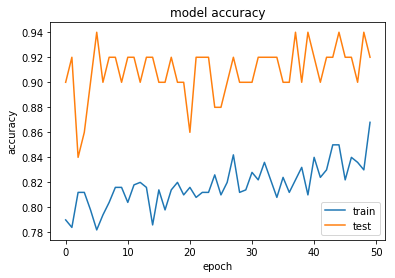

In [181]:
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

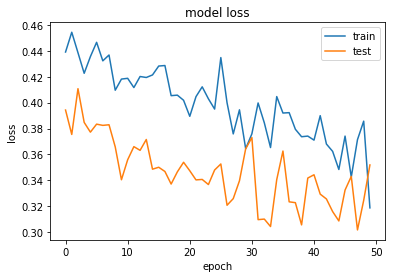

In [182]:
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

### Multilayer Perceptron Implementation

In [221]:
model3 = keras.Sequential([
    #keras.layers.Dropout(r, input_shape=(8,)),
    keras.layers.Dense(60, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])


model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model3.fit(data, labels, epochs=30, validation_data=(test_data,test_labels), verbose=0)

test_loss3, test_acc3 = model3.evaluate(test_data, test_labels)

print('Test accuracy:', test_acc3)

50/50 [==============================] - 0s 38us/step
Test accuracy: 0.8399999904632568


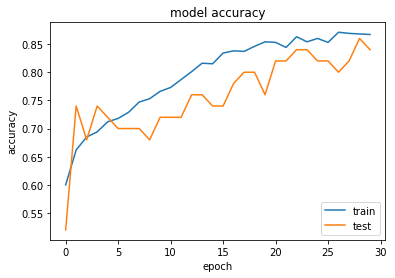

In [222]:
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

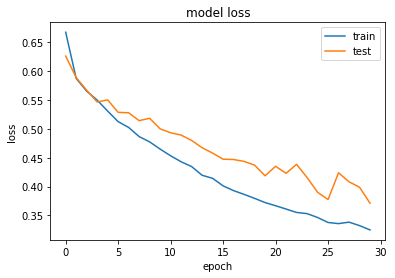

In [223]:
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

### Small Data Model 
- Low complexity (high bias) model for small data
- Same number of layers as features at least (in this case, 8). 